In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_rows',60)

In [9]:
df=pd.read_excel('Educational_themes.xlsx',sheet_name='Sheet1',header=0)

In [10]:
df.head()

School_ID Curriculum Themes_applied Theme_A Theme_B Theme_C Other  \
0     SC_01     France             No      No      No      No    No   
1     SC_02     France            Yes      No      No      No    No   
2     SC_03     France            Yes      No      No      No    No   
3     SC_04      Other            Yes      No      No      No    No   
4     SC_05     France            Yes      No      No      No    No   

         Approach Studies_applied Theme vs subject  
0  Not Applicable  Not Applicable   Not Applicable  
1       No Answer              No            Other  
2       No Answer              No            Other  
3       No Answer              No            Other  
4       No Answer             Yes            Other

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   School_ID         147 non-null    object
 1   Curriculum        147 non-null    object
 2   Themes_applied    147 non-null    object
 3   Theme_A           147 non-null    object
 4   Theme_B           147 non-null    object
 5   Theme_C           147 non-null    object
 6   Other             147 non-null    object
 7   Approach          147 non-null    object
 8   Studies_applied   147 non-null    object
 9   Theme vs subject  145 non-null    object
dtypes: object(10)
memory usage: 11.6+ KB


In [12]:
df.isna().sum()

School_ID           0
Curriculum          0
Themes_applied      0
Theme_A             0
Theme_B             0
Theme_C             0
Other               0
Approach            0
Studies_applied     0
Theme vs subject    2
dtype: int64

# Re-arrange the data

In [13]:
df_compact = df.iloc[:,0:19].copy()
df_compact['Curriculum'] = df_compact['Curriculum'].replace({'Not Applicable':np.NaN,'No Answer':np.NaN,'Other':np.NaN})
df_compact['Themes_applied'] = df_compact['Themes_applied'].replace({'Not Applicable':np.NaN})
df_compact['Approach'] = df_compact['Approach'].replace({'Not Applicable':np.NaN,
                                'No Answer':np.NaN,'Other':np.NaN,'Other,':np.NaN,
                                'Interdisciplinary(Integrated),Theme-based':'A',
                                'Theme-based':'B',
                                'Interdisciplinary(Integrated)':'C',
                                'Multidisciplinary(Single subjects)':'D',
                                'Multidisciplinary(Single subjects),Interdisciplinary(Integrated)':'E',
                                'Multidisciplinary(Single subjects),Interdisciplinary(Integrated),Theme-based,Other':'F',
                                'Multidisciplinary(Single subjects),Theme-based':'G',
                                'Multidisciplinary(Single subjects),Interdisciplinary(Integrated),Theme-based':'H',
                                'Multidisciplinary(Single subjects),Other':'I'})

df_compact['Theme vs subject'] = df_compact['Theme vs subject'].replace({'X':np.NaN})
df_compact['Theme vs subject'] = df_compact['Theme vs subject'].replace({'Not Applicable':np.NaN,'No Answer':np.NaN,'Other':np.NaN})
df_compact.fillna(inplace=True,value='N/A')


In [14]:
df_compact

School_ID Curriculum Themes_applied Theme_A Theme_B Theme_C Other  \
0       SC_01     France             No      No      No      No    No   
1       SC_02     France            Yes      No      No      No    No   
2       SC_03     France            Yes      No      No      No    No   
3       SC_04        N/A            Yes      No      No      No    No   
4       SC_05     France            Yes      No      No      No    No   
..        ...        ...            ...     ...     ...     ...   ...   
142    SC_143      SWISS            Yes      No      No      No    No   
143    SC_144         US            Yes     Yes      No     Yes    No   
144    SC_145         US            Yes      No     Yes      No    No   
145    SC_146         US            Yes      No      No      No    No   
146    SC_147      SWISS            Yes      No      No      No    No   

    Approach Studies_applied   Theme vs subject  
0        N/A  Not Applicable                N/A  
1        N/A              No                N/A  
2        N/A              No                N/A  
3        N/A              No                N/A  
4        N/A             Yes                N/A  
..       ...             ...                ...  
142      N/A              No           Enriched  
143        A             Yes  Thought provoking  
144        C              No           Relevant  
145      N/A              No           Relevant  
146        E              No                N/A  

[147 rows x 10 columns]

# School types

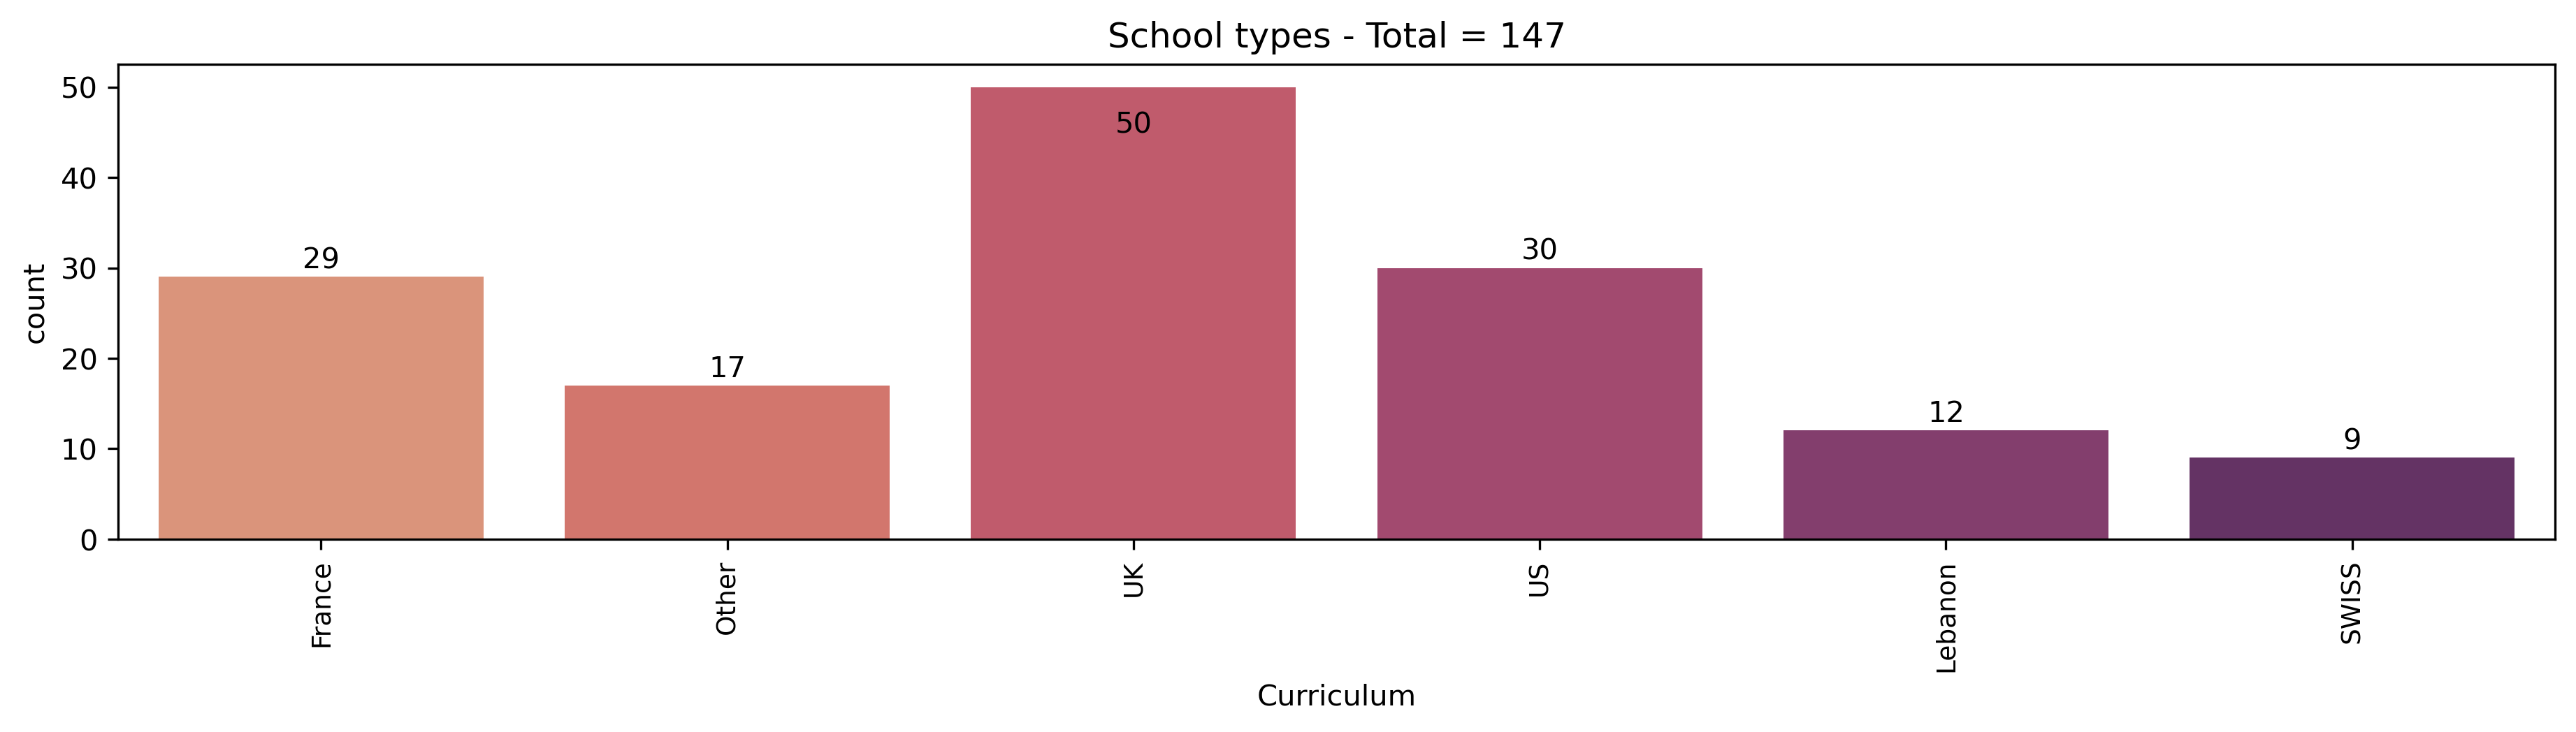

In [15]:
df_school_type = df.loc[:,['School_ID','Curriculum']].copy()

plt.figure(figsize=[15,3],dpi=300)
ax = sns.countplot(x=df_school_type['Curriculum'],palette='flare')
ax.set_title('School types - Total = {}'.format(df_school_type['Curriculum'].count()))
plt.xticks(rotation='90',fontsize=9)

max_height=0
for x in ax.patches:
    h = x.get_height()
    max_height = h if h > max_height else max_height

for x in ax.patches:
    if x.get_height() < max_height:
        ax.annotate(x.get_height(),(x.get_x()+0.4,x.get_height()+1),ha='center',fontsize=10)
    else:
        ax.annotate(x.get_height(),(x.get_x()+0.4,x.get_height()-5),ha='center',fontsize=10)
        
plt.show();

# Are the study concepts implemented?

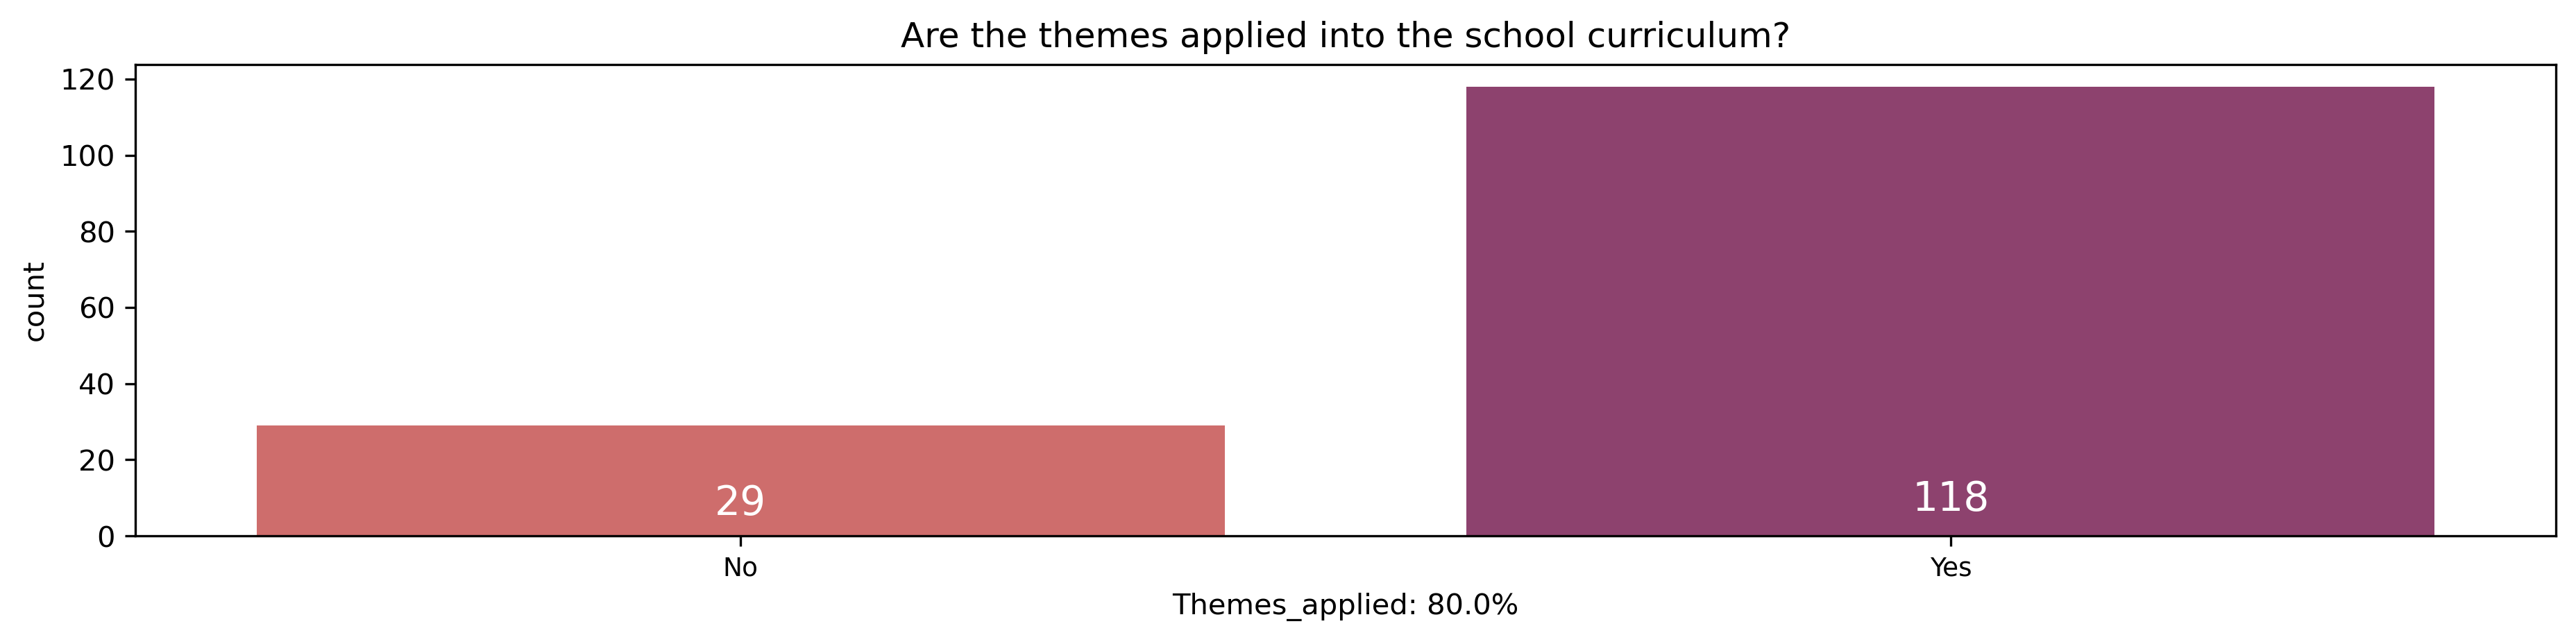

In [16]:
fig,ax = plt.subplots(figsize=(15,3),dpi=300)
ax = sns.countplot(x=df_compact['Themes_applied'],palette='flare')
ax.set_title('Are the themes applied into the school curriculum?')
perc = round((df_compact['Themes_applied'] == 'Yes').sum() / df_compact['Themes_applied'].value_counts().sum(),2)*100
ax.set_xlabel('Themes_applied: {}%'.format(perc))
plt.xticks(fontsize=9)
for x in ax.patches:
    ax.annotate(x.get_height(),(x.get_x()+0.4,x.get_x()+6),size=14,color='white',ha='center')

# What subjects are incorporated in the study concepts?

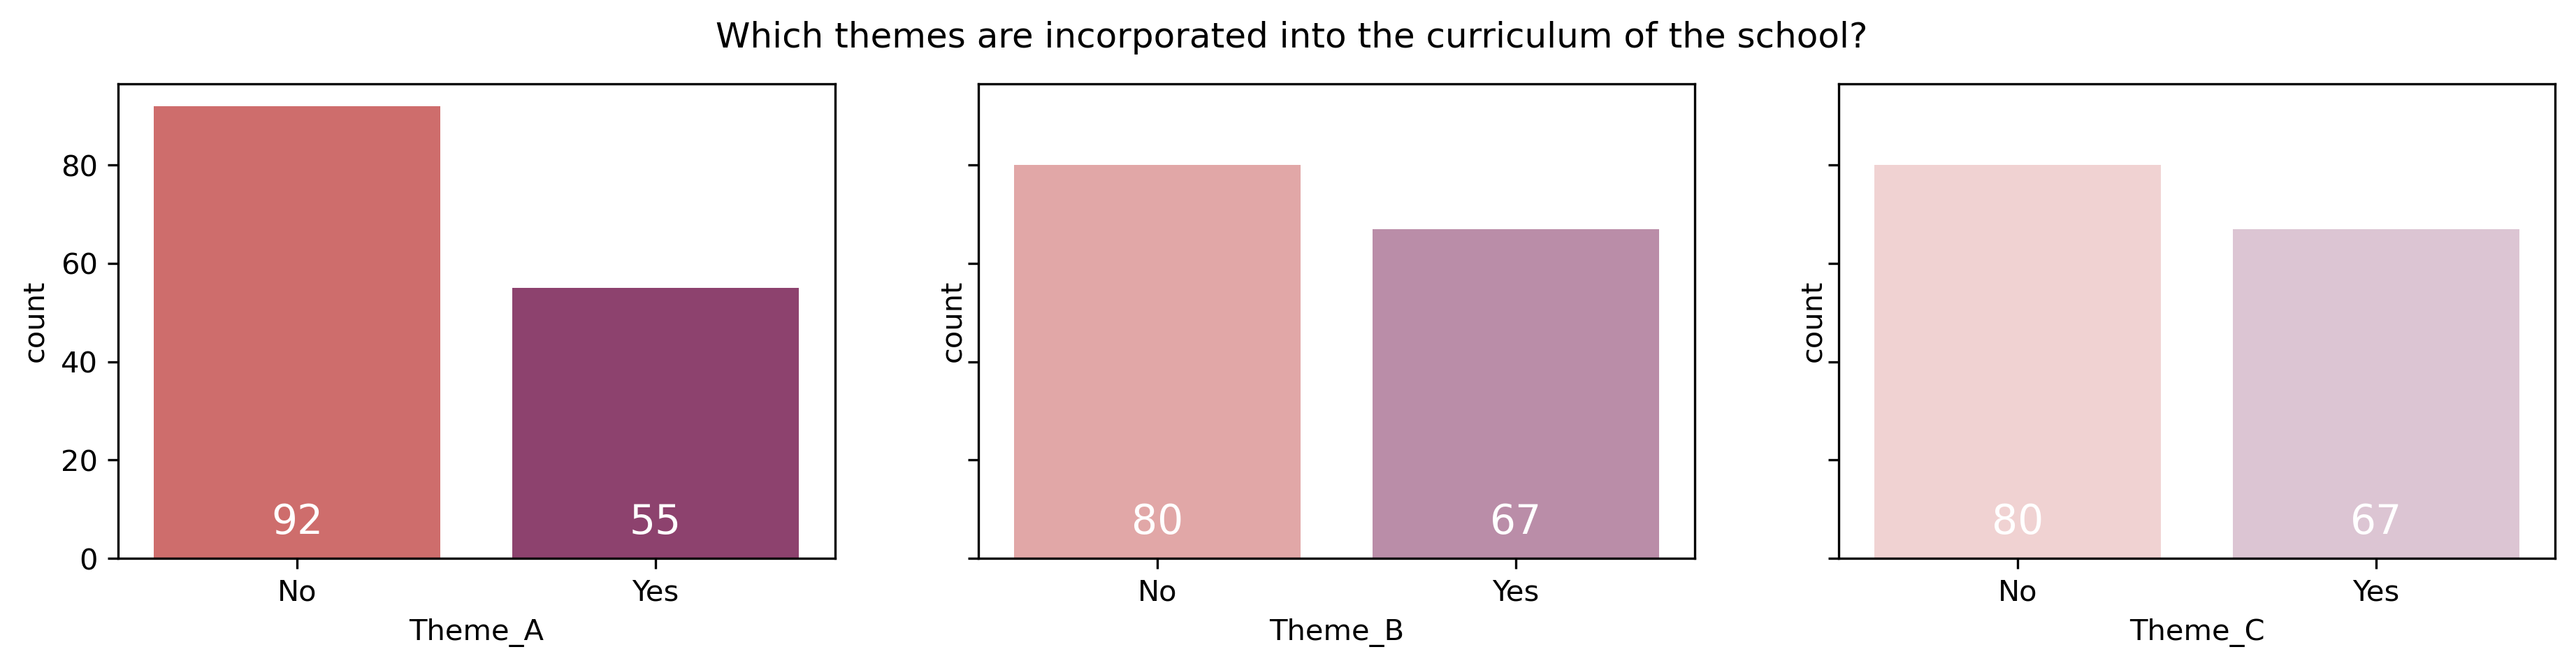

In [17]:
fig,ax = plt.subplots(1,3,sharey=True,figsize=(15,3),dpi=300)
ax_one = sns.countplot(ax=ax[0],x=df_compact['Theme_A'],palette='flare',alpha=1)
ax_two = sns.countplot(ax=ax[1],x=df_compact['Theme_B'],palette='flare',alpha=0.6)
ax_three = sns.countplot(ax=ax[2],x=df_compact['Theme_C'],palette='flare',alpha=0.3)
fig.suptitle('Which themes are incorporated into the curriculum of the school? ')

for x in ax_one.patches:
    ax_one.annotate(x.get_height(),(x.get_x()+0.4,x.get_y()+5),size=14,color='White',ha='center')
for x in ax_two.patches:
    ax_two.annotate(x.get_height(),(x.get_x()+0.4,x.get_y()+5),size=14,color='White',ha='center')
for x in ax_three.patches:
    ax_three.annotate(x.get_height(),(x.get_x()+0.4,x.get_y()+5),size=14,color='White',ha='center')   
    

# What is the approach used in the study concepts?

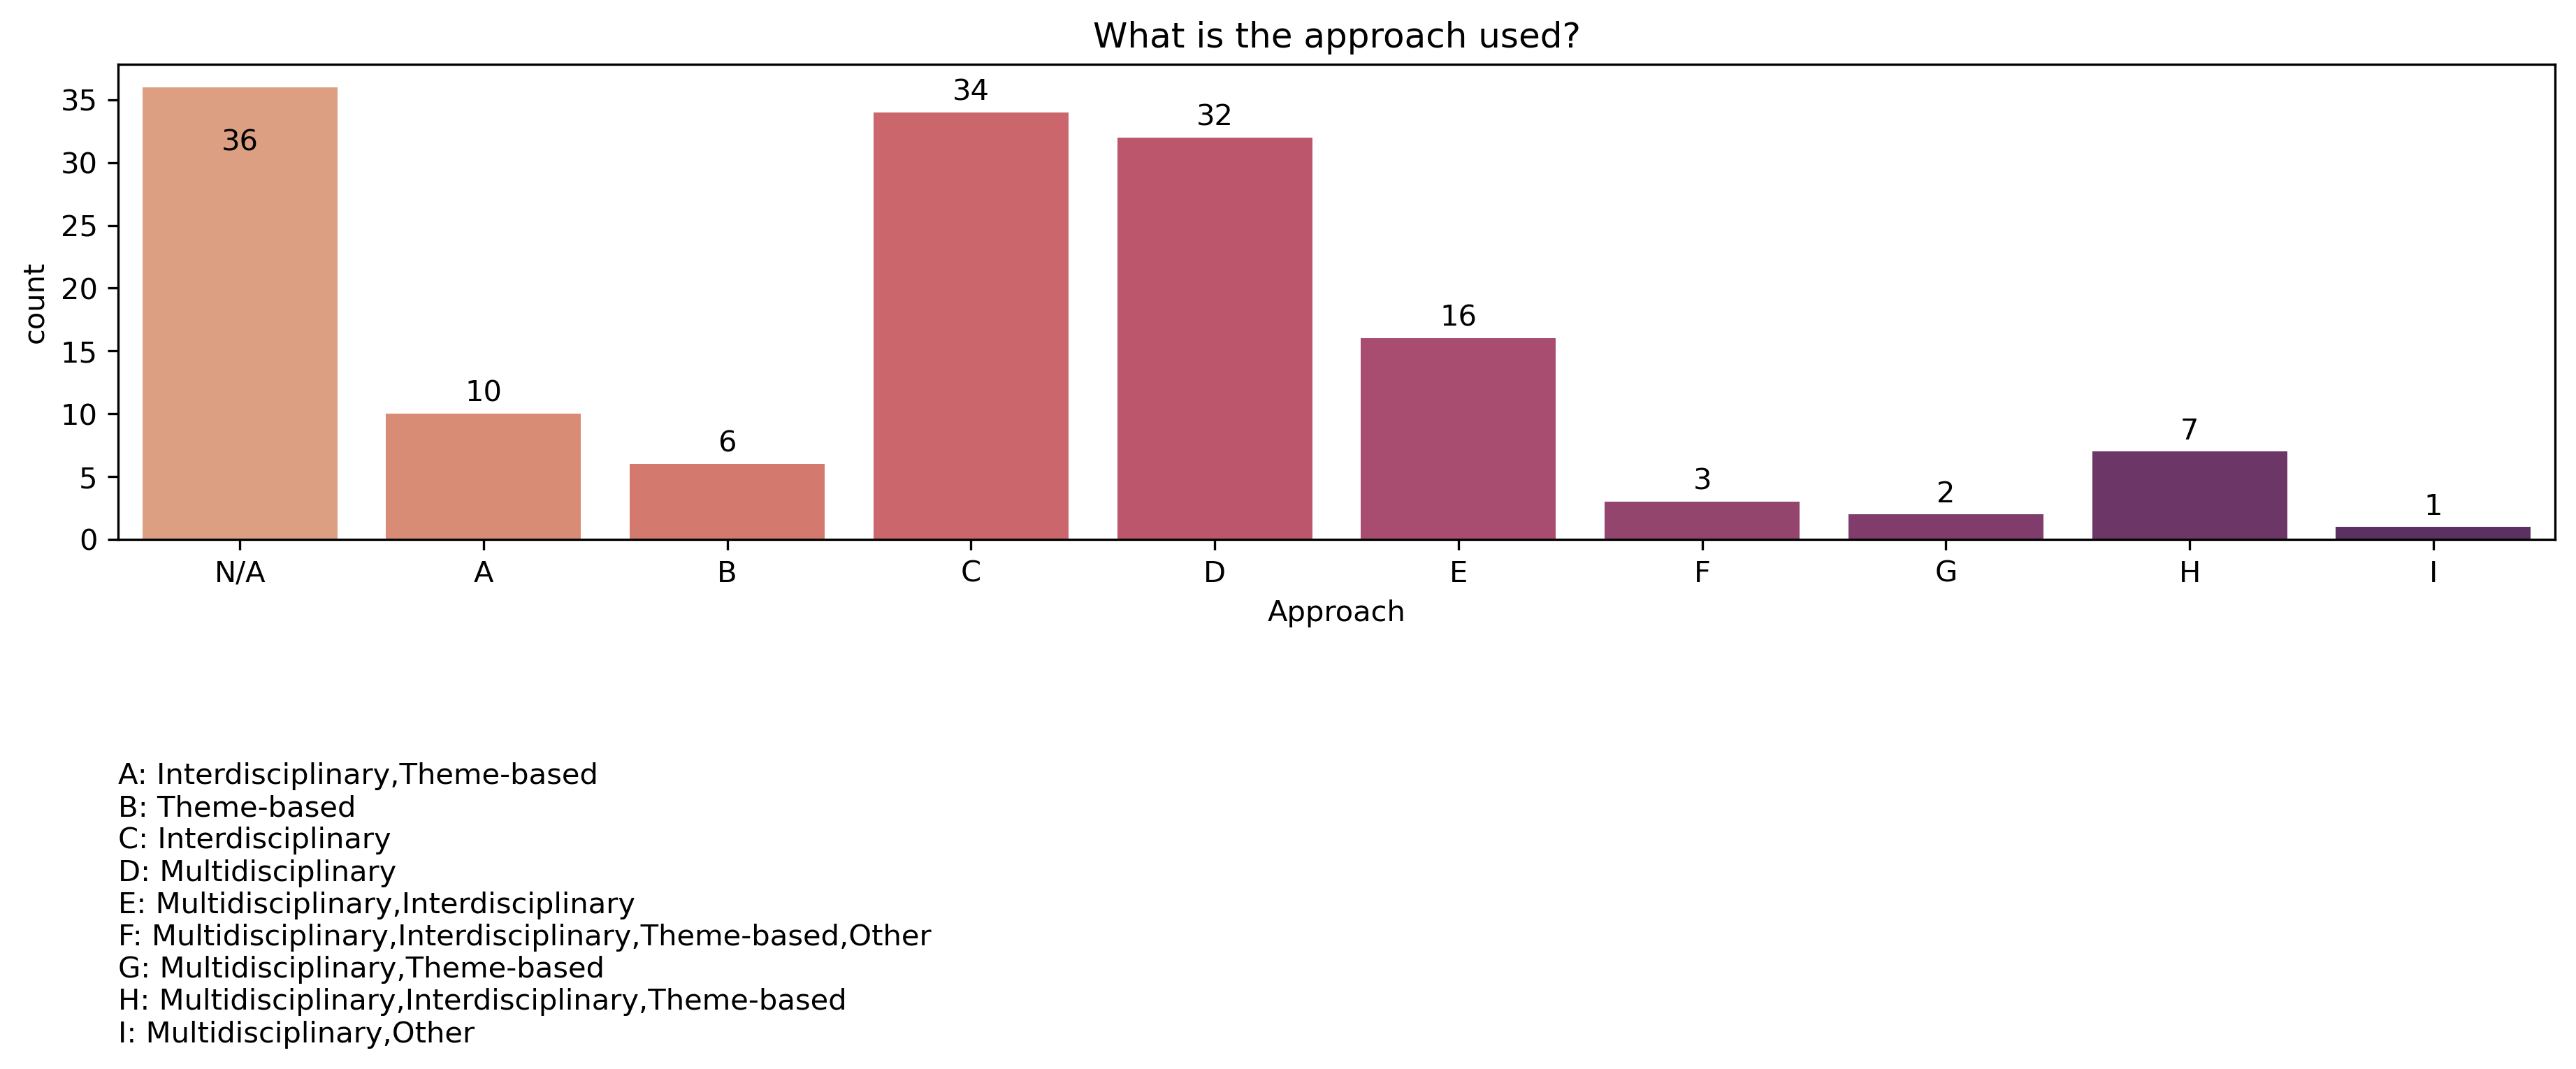

In [18]:
fig,ax = plt.subplots(figsize=(15,3),dpi=300)
ax=sns.countplot(x=df_compact['Approach'],palette='flare')

max_height=0
for x in ax.patches:
    h = x.get_height()
    max_height = h if h > max_height else max_height

for x in ax.patches:
    if x.get_height() < max_height:
        ax.annotate(x.get_height(),(x.get_x()+0.4,x.get_height()+1),ha='center',fontsize=10)
    else:
        ax.annotate(x.get_height(),(x.get_x()+0.4,x.get_height()-5),ha='center',fontsize=10)
    
ax.set_title('What is the approach used?')
my_text = 'A: Interdisciplinary,Theme-based\nB: Theme-based\nC: Interdisciplinary\nD: Multidisciplinary\nE: Multidisciplinary,Interdisciplinary\nF: Multidisciplinary,Interdisciplinary,Theme-based,Other\nG: Multidisciplinary,Theme-based\nH: Multidisciplinary,Interdisciplinary,Theme-based\nI: Multidisciplinary,Other'
plt.text(-0.5,-40,my_text,ha='left',fontsize=10)
plt.show()

# Module for comparing 2 variables

In [19]:
def compare_two(X,Y,w,h,title):
    fig,ax = plt.subplots(figsize=(w,h),dpi=600)
    ax = sns.scatterplot(x=X,y=Y,color='blue')
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=6)
    plt.title(title)
    plt.grid()

In [20]:
# compare curriculum with schools

compare_two(df_compact['Curriculum'],df_compact['School_ID'],20,40,'Curriculum vs Schools')

In [21]:
compare_two(df_compact['Approach'],df_compact['School_ID'],20,40,'Approach vs Schools')